<a href="https://colab.research.google.com/github/MIK412/Visualization/blob/main/%D0%A1%D0%BF%D0%B5%D1%86%D0%BA%D1%83%D1%80%D1%81_Python_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Краткое описание задания
Перед вами 6 заданий с разным уровнем сложности на основе одного датафрейма.

Зачет будет проходить в формате общения на предмет решенных задач, где будем обсуждать не только полученные ответы, но и путь решения/почему такой ответ мог получиться.

Для большей части задач визуализация является важным дополнением, без которой возможно получение только неполного балла. Для последней задачи итоговый балл варьируется в зависимости от сложности представленного решения.

## Задание 1 [5 баллов]

* Разбейте пользователей приложения на возрастные группы с интервалом в 5 лет (например, группа пользователей  (20-25] лет).
Выделите среди них возрастную группу, которая стала самой активной (в абсолютных значениях) в репостах сторис.
В ответе отразите возрастной интервал, а также кол-во репостов сторис
#### Формат ответа:
40-45; 1111

In [ ]:
import pandas as pd
import numpy as  np
import string

data = pd.read_csv('final_ff_1.csv',sep = ';',on_bad_lines='skip')
data.drop_duplicates()

min_age = data['age'].min()
max_age = data['age'].max()
data['age_group'] = pd.cut(data['age'],bins=range(min_age, max_age + 5, 5))

repost_data = data[data['share_tap_flg'] == 1]
repost_counts = repost_data.groupby('age_group')['share_tap_flg'].sum()
most_active_group = repost_counts.idxmax()
repost_count = repost_counts[most_active_group]

result = f'{most_active_group}; {repost_count}'
result = result.replace('(', '').replace(']','').replace(', ','-')
print(result)

30-35; 245


## Задание 2 [5 баллов]

* Кто чаще ставит лайки сторис: пользователи, которые находятся внутри страны (inside_country),или пользователи за её пределами(outside_country)?
В ответе укажите, кто ставит лайки чаще, а также укажите долю лайков от общего количества показанных сторис для данной группы (округлите проценты до тысячных).
#### Формат ответа:
outside_country; 20.012



In [ ]:
import pandas as pd
import numpy as  np

data = pd.read_csv('final_ff_1.csv',sep = ';',on_bad_lines='skip')
data.drop_duplicates()
data.dropna(subset=['geo_country'], inplace=True)

country = set(data['geo_country'])
x = 'RU'
country.remove(x)
gc = data.groupby('geo_country', as_index=False).agg({'like_tap_flg': 'sum','prosmotr':'sum'})
inside_country = gc[gc['geo_country'] == x]
outside_country = gc[gc.geo_country.isin(country)]
out_part = outside_country['like_tap_flg'].sum() / outside_country['prosmotr'].sum()
in_part = inside_country['like_tap_flg'].sum() / inside_country['prosmotr'].sum()
percentage_of_likes =  round(in_part*100,3) if in_part > out_part else round(out_part*100,3)
group_with_more_likes = 'inside_country' if in_part > out_part else 'outside_country'

print(group_with_more_likes, percentage_of_likes, sep = '; ')


inside_country; 0.702


## Задание 3 [5 баллов]

* Назовите краткое название сторис (поле name), которая показала наибольшую конверсию в категорию "любимые" (т.е. были добавлены в закладки пользователями - favorite_tap_flg). При выборе анализируйте только те сторис, которые были показаны более, чем 100 раз.



In [ ]:
import pandas as pd
import numpy as  np

data = pd.read_csv('final_ff_1.csv',sep = ';',on_bad_lines='skip')
data.drop_duplicates()
data.dropna(subset=['name'], inplace=True)

new_data = data.groupby("story_id", as_index=False)[["favorite_tap_flg", 'prosmotr']].agg("sum")
new_data = new_data[new_data['prosmotr'] > 100]
new_data['part'] = new_data['favorite_tap_flg']/new_data['prosmotr']
max_part = new_data['part'].idxmax()

fav_story_id = new_data.loc[max_part, 'story_id']
data2 = data.loc[data['story_id'] == fav_story_id]
print(data2.iloc [0]['name'])


Как выучить язык


## Задание 4 [10 баллов]

* Найдите название истории, в которой в зависимости от региона разброс доли просмотров максимальный и выведите эти топ-три таких регионов




In [ ]:
import pandas as pd
import numpy as  np

data = pd.read_csv('final_ff_1.csv',sep = ';',on_bad_lines='skip')
data.drop_duplicates()
data.dropna(subset=['name'], inplace=True)

data['part'] = data.groupby(['story_id','geo_region'])['geo_region'].transform('count')/data.groupby(['story_id'])['story_id'].transform('count')
id = data.groupby(['story_id']).agg({'part': lambda p: p.max()-p.min()})['part'].idxmax()
name = data[data['story_id'] == id].iloc [0]['name']
print(f'Название истории: {name}')
print((data[data['story_id'] == id].groupby(['geo_region','part'])['geo_region'].unique().reset_index(name='region').sort_values('part', ascending=False))[['geo_region','part']])


Название истории: Ваша подписка Tinkoff Pro
  geo_region      part
1        MOW  0.925926
0        MOS  0.037037


## Задание 5 [10 баллов]

* Постройте распределение клиентов в зависимости от возраста, типа устройства и типа операционной системы
* Ответьте на вопрос: "Как меняется в зависимости от возраста число клиентов с каждым типом операционной системы и типом устройства?"

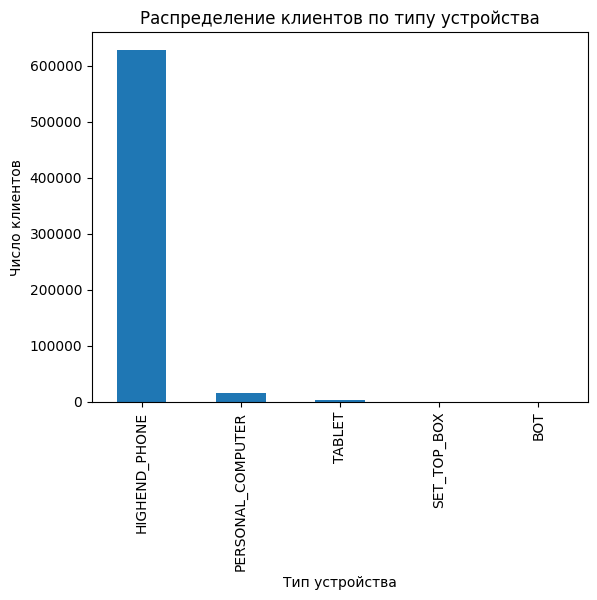

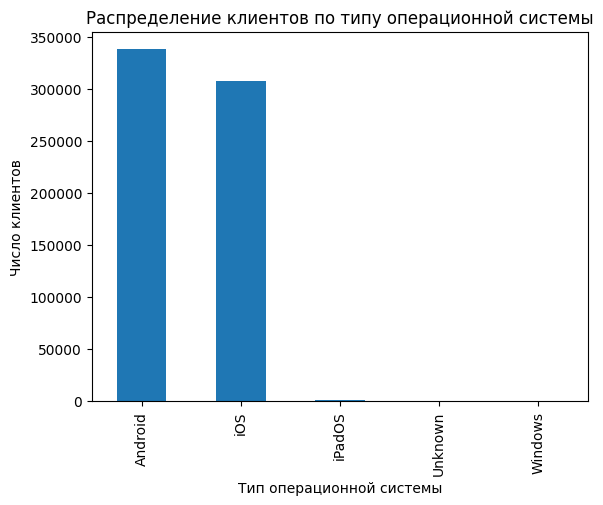

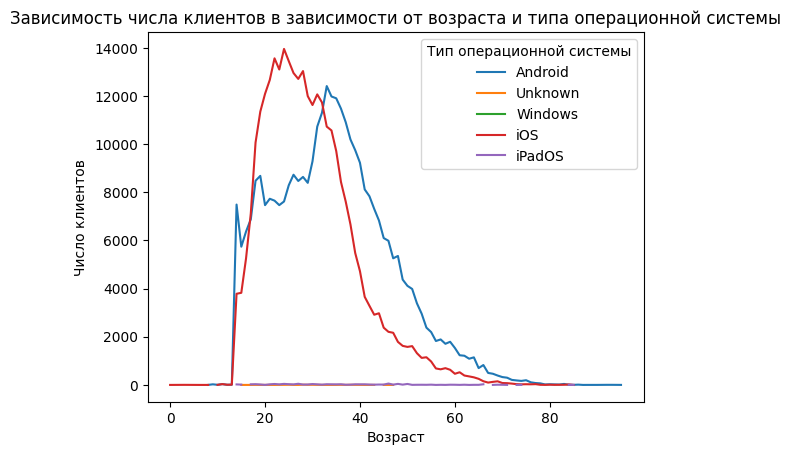

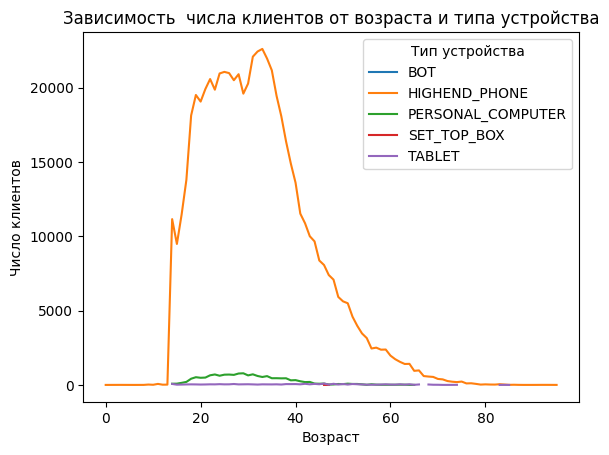

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('final_ff_1.csv',sep = ';',on_bad_lines='skip')
data.drop_duplicates()
data.dropna(subset=['age','device_type','os'], inplace=True)


#sns.catplot(x = 'age', y = 'device_type', hue = 'os', data = data, kind = 'strip');

#sns.pairplot(data[['age', 'device_type', 'os']].sample(frac = 0.2, random_state = 42),
#             hue = 'os',
#             height = 4);

device_counts = data['device_type'].value_counts()
device_counts.plot(kind='bar')
plt.xlabel("Тип устройства")
plt.ylabel("Число клиентов")
plt.title("Распределение клиентов по типу устройства")
plt.show()

os_counts = data['os'].value_counts()
os_counts.plot(kind='bar')
plt.xlabel("Тип операционной системы")
plt.ylabel("Число клиентов")
plt.title("Распределение клиентов по типу операционной системы")
plt.show()

age_os_counts = data.groupby(['age', 'os']).size().unstack()
age_os_counts.plot(kind='line')
plt.xlabel("Возраст")
plt.ylabel("Число клиентов")
plt.title("Зависимость числа клиентов в зависимости от возраста и типа операционной системы")
plt.legend(title="Тип операционной системы")
plt.show()

age_device_counts = data.groupby(['age', 'device_type']).size().unstack()
age_device_counts.plot(kind='line')
plt.xlabel("Возраст")
plt.ylabel("Число клиентов")
plt.title("Зависимость  числа клиентов от возраста и типа устройства")
plt.legend(title="Тип устройства")
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('final_ff_1.csv',sep = ';',on_bad_lines='skip')
data.drop_duplicates()
data.dropna(subset=['age','device_type','os'], inplace=True)

data_pivot_table = data.pivot_table(index=['device_type', 'os'],
                                columns='age', aggfunc=['count'], fill_value=0, margins = True)
data_pivot_table

count                                    ...  \
                          app_or_web                                    ...   
age                                0  3  6  8   9 10  11  12  13    14  ...   
device_type       os                                                    ...   
BOT               Android          0  0  0  0   0  0   0   0   0     0  ...   
HIGHEND_PHONE     Android          0  0  0  2  26  6  34   8  10  7446  ...   
                  Unknown          0  0  0  0   0  0   0   0   0     0  ...   
                  iOS              1  4  1  1   0  5  35   9  12  3704  ...   
PERSONAL_COMPUTER Android          0  0  0  0   0  0   0   0   0     0  ...   
                  Windows          0  0  0  0   0  0   0   0   0     0  ...   
                  iOS              0  0  0  0   0  0   0   0   0    82  ...   
                  iPadOS           0  0  0  0   0  0   0   0   0     0  ...   
SET_TOP_BOX       Android          0  0  0  0   0  0   0   0   0     0  ...   
TABLET            Android          0  0  0  0   0  0   0   0   0    45  ...   
                  iOS              0  0  0  0   0  0   0   0   0     0  ...   
                  iPadOS           0  0  0  0   0  0   0   0   0    22  ...   
All                                1  2  0  3  16  5  44  11  15  6048  ...   

                                                                      
                          user_id                                     
age                            84 85  86 87 88 90 92 93 95       All  
device_type       os                                                  
BOT               Android       0  0   0  0  0  0  0  0  0       4.0  
HIGHEND_PHONE     Android       6  5  13  1  2  2  5  5  2  177266.0  
                  Unknown       0  0   0  0  0  0  0  0  0      58.0  
                  iOS          20  1   0  4  0  0  0  0  0  145818.0  
PERSONAL_COMPUTER Android       0  0   0  0  0  0  0  0  0       1.0  
                  Windows       0  0   0  0  0  0  0  0  0       NaN  
                  iOS           1  0   0  0  0  0  0  0  0    7542.0  
                  iPadOS        0  0   0  0  0  0  0  0  0       NaN  
SET_TOP_BOX       Android       0  0   0  0  0  0  0  0  0       7.0  
TABLET            Android       0  0   0  0  0  0  0  0  0     582.0  
                  iOS           0  0   0  0  0  0  0  0  0      21.0  
                  iPadOS        4  1   0  0  0  0  0  0  0     524.0  
All                             5  4   7  4  1  2  1  2  1  331823.0  

[13 rows x 1513 columns]

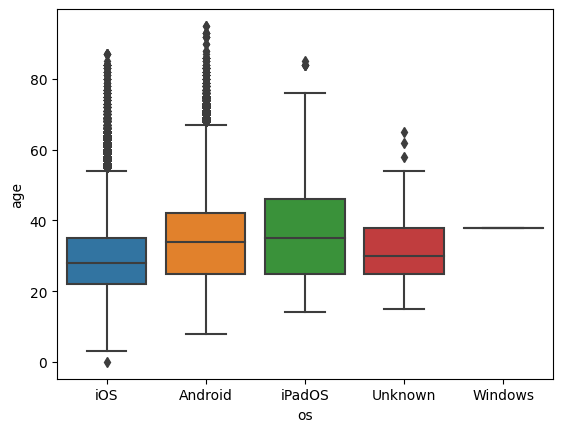

In [ ]:
sns.boxplot(x = 'os', y = 'age', data = data);

## Задание 6 [15 баллов]

#### Представьте что вы аналитик сторис.
* Определите категорию клиентов, у которых будет самая большая конверсия в лайк при запуске новой истории по тратам?
* В какие дни эта история будет максимально эффективной и почему?


(70, 75]


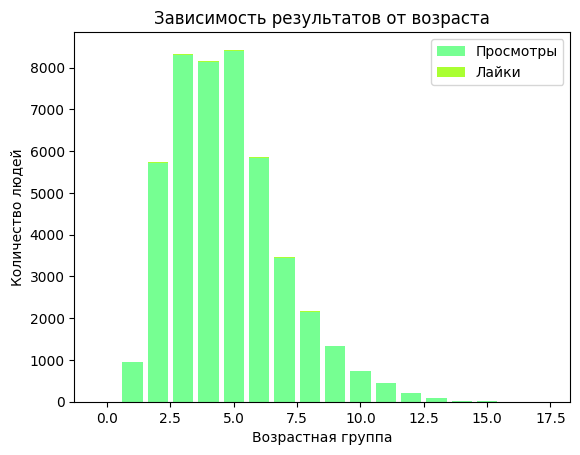

<Axes: xlabel='age_group'>

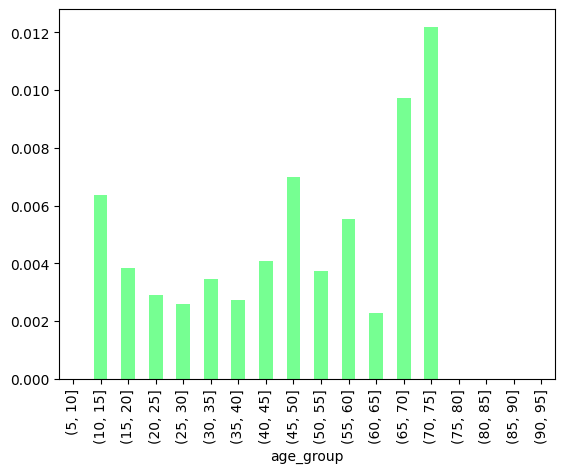

In [ ]:
import pandas as pd
import numpy as  np
import string
data = pd.read_csv('final_ff_1.csv',sep = ';',on_bad_lines='skip')
data.drop_duplicates()
pd.options.mode.chained_assignment = None
data.dropna(subset=['name'], inplace=True)

trat_data = data[data['name'].str.contains(r'трат',na=True) == True]
trat_data['age_group'] = pd.cut(trat_data['age'],bins=range(5, 100, 5))
trat_data_group = trat_data.groupby('age_group').agg({'like_tap_flg':'sum','prosmotr':'sum'})
trat_data_group['conver'] = trat_data_group['like_tap_flg'] / trat_data_group['prosmotr']
most_active_group = trat_data_group['conver'].idxmax()
trat_data_group
print(most_active_group)

#Графики
likes = trat_data_group['like_tap_flg'].tolist()
prosmotr = trat_data_group['prosmotr'].tolist()

p1 = plt.bar(range(0,18),prosmotr, color='#76FF92')
p2 = plt.bar(range(0,18),likes, bottom=prosmotr, color='#AAFF32')
plt.legend((p1[0],p2[0]),('Просмотры', 'Лайки'))
plt.ylabel('Количество людей')
plt.xlabel('Возрастная группа')
plt.title('Зависимость результатов от возраста')
plt.show()

trat_data_group['conver'].plot(kind='bar', color = '#76FF92')


In [ ]:
#Второй вопрос
def weekday_full_name(weekday):
  if weekday == '1,0':
    return 'Понедельник'
  elif weekday == '2,0':
    return 'Вторник'
  elif weekday == '3,0':
    return 'Среда'
  elif weekday == '4,0':
    return 'Четверг'
  elif weekday == '5,0' :
    return 'Пятница'
  elif weekday == '6,0' :
    return 'Суббота'
  else:
    return 'Воскресенье'
trat_day = trat_data.groupby('day_of_week').agg({'like_tap_flg':'sum','favorite_tap_flg':'sum','share_tap_flg':'sum','prosmotr':'sum'})
trat_day['part'] = (trat_day['like_tap_flg'] + trat_day['favorite_tap_flg'] + trat_day['share_tap_flg'])/trat_day['prosmotr']
day_of_week = trat_day['part'].idxmax()
print(weekday_full_name(day_of_week),'- день, когда история будет максимально эффективной, потому что в этот день происходит больше всего взаимодействий с историями трат')



Пятница - день, когда история будет максимально эффективной, потому что в этот день происходит больше всего взаимодействий с историями трат
